In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## hide warning messages 
import warnings
warnings.filterwarnings('ignore')

## Introduction to network analysis

#### 1. Basics 

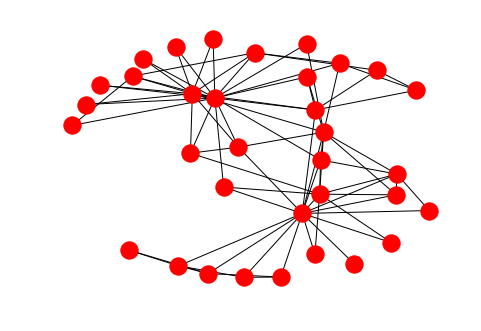

In [10]:
## load famous karate_club_graph, built-in in nx 
G = nx.karate_club_graph()
nx.draw(G)
nx.write_gml(G,'data/karate.gml')

## read gml back 
G = nx.read_gml('data/karate.gml')

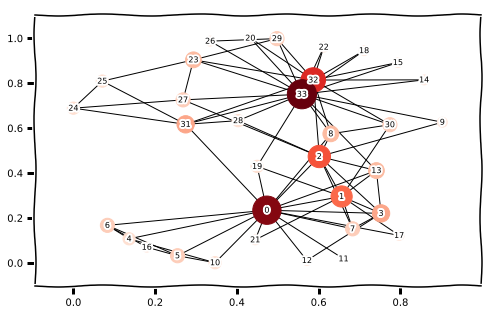

In [23]:
## graph, scale nodes absed one degree centrality 
## not in python k.values() returns dict_values, we need to turn it into list 
k = nx.degree(G)
layout = nx.spring_layout(G)
plt.figure(1, figsize=(8,5))
nx.draw_networkx(G,
                 pos=layout,
                 nodelist=k.keys(),
                 node_size = [d*50 for d in list(k.values())],  ## change the size of the node, based on degree
                 node_color=list(k.values()),                   ## change color abased on degree
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

#### 2. Adjacency matrix 

In [25]:
## pass in node sequence, to make sure the order is correct 
node_list = G.nodes()
node_list.sort()
A = nx.to_numpy_matrix(G = G,nodelist=node_list)  #,weight ='CDIS_IAD', you can assign weight as well
A

matrix([[ 0.,  1.,  1., ...,  1.,  0.,  0.],
        [ 1.,  0.,  1., ...,  0.,  0.,  0.],
        [ 1.,  1.,  0., ...,  0.,  1.,  0.],
        ..., 
        [ 1.,  0.,  0., ...,  0.,  1.,  1.],
        [ 0.,  0.,  1., ...,  1.,  0.,  1.],
        [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

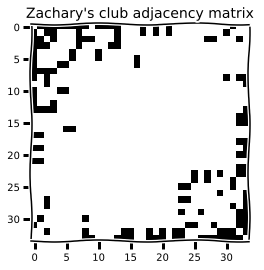

In [42]:
# show adjacency matrix
plt.figure(1, figsize=(4, 4))
plt.imshow(A,
           cmap="Greys",
           interpolation="none"
           )
plt.title('Zachary\'s club adjacency matrix', fontsize=14)

In [43]:
## with adj matrix you can find node degree using matrix 
## assuming all weigts are 1 
k = np.sum(A,axis=0)
k 
## of course you can use G.degree() to get degrees 

matrix([[ 16.,   9.,  10.,   6.,   3.,   4.,   4.,   4.,   5.,   2.,   3.,
           1.,   2.,   5.,   2.,   2.,   2.,   2.,   2.,   3.,   2.,   2.,
           2.,   5.,   3.,   3.,   2.,   4.,   3.,   4.,   4.,   6.,  12.,
          17.]])

#### 3. linear algebra 

In [45]:
## import some distance measueing matrix 
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform

In [57]:
## define a matrix draw function 
def show_matrix(M,title):
    plt.figure(figsize=(4, 4))
    plt.imshow(M,cmap="Greys",interpolation="none")
    plt.title(title, fontsize=14)

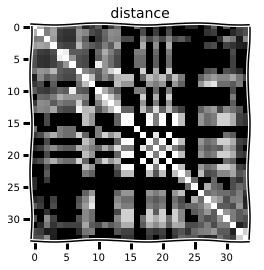

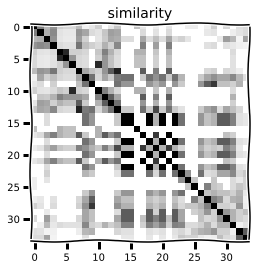

In [59]:
## bais distance calculateion, for adj matrix 
M = pdist(A, 'cosine')                 # it will return a vector, this is using cosine distance
M = squareform(M)                      # convert the vector to a diaganal matrix 
S = 1-M                                # similarity measure = 1 - distance matrix 
## show it in graph 
show_matrix(M,'distance')
show_matrix(S,'similarity')